In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [96]:
import numpy as np

# Train

In [2]:
base_dir = 'datasets/dogs_vs_cats/'
train_dir = os.path.join(base_dir, 'train')

In [3]:
train_dogs_dir = os.path.join(train_dir, 'dogs')
train_cats_dir = os.path.join(train_dir, 'cats')

In [4]:
generator = ImageDataGenerator(rescale=1.0/255., validation_split=0.3)

In [5]:
train_generator = generator.flow_from_directory(train_dir,
                                                batch_size=20,
                                                class_mode='binary',
                                                target_size=(150, 150),
                                                subset='training'
                                               )

val_generator = generator.flow_from_directory(train_dir,
                                                batch_size=20,
                                                class_mode='binary',
                                                target_size=(150, 150),
                                                subset='validation'
                                               )

Found 17500 images belonging to 2 classes.
Found 7500 images belonging to 2 classes.


In [6]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

In [7]:
train_cats_fnames = os.listdir(train_cats_dir)
train_dogs_fnames = os.listdir(train_dogs_dir)

In [8]:
print(train_cats_fnames[:10])
print(train_dogs_fnames[:10])

['cat.2587.jpg', 'cat.5777.jpg', 'cat.5479.jpg', 'cat.2561.jpg', 'cat.6315.jpg', 'cat.12084.jpg', 'cat.3573.jpg', 'cat.6867.jpg', 'cat.4188.jpg', 'cat.1035.jpg']
['dog.8939.jpg', 'dog.4870.jpg', 'dog.6630.jpg', 'dog.6063.jpg', 'dog.12330.jpg', 'dog.5347.jpg', 'dog.3869.jpg', 'dog.11833.jpg', 'dog.3787.jpg', 'dog.9037.jpg']


In [9]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [57]:
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1, l2

In [13]:
from tensorflow.keras.optimizers import RMSprop

In [28]:
train_histories = []

In [52]:
### model 0 and 1:
# model = Sequential([
#     Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
#     MaxPooling2D(2, 2),
#     Conv2D(32, (3, 3), activation='relu'),
#     MaxPooling2D(2, 2),
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D(2, 2),
#     Flatten(),
#     Dropout(0.5),
#     Dense(512, activation='relu'),
#     Dropout(0.5),
#     Dense(1, activation='sigmoid')
# ])

In [46]:
### model 2 and 3:
# model = Sequential([
#     Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
#     MaxPooling2D(2, 2),
#     Conv2D(32, (3, 3), activation='relu'),
#     MaxPooling2D(2, 2),
#     #Conv2D(64, (3, 3), activation='relu'),
#     Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(l=0.01)),
#     MaxPooling2D(2, 2),
#     Flatten(),
#     Dense(512, activation='relu'),
#     Dropout(0.5),
#     Dense(1, activation='sigmoid')
# ])

In [71]:
### model 4 and 5:
# model = Sequential([
#     BatchNormalization(input_shape=(150, 150, 3)),
#     Conv2D(16, (3, 3), activation='relu'),
#     MaxPooling2D(2, 2),
#     Conv2D(32, (3, 3), activation='relu'),
#     MaxPooling2D(2, 2),
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D(2, 2),
#     Flatten(),
#     Dropout(0.5),
#     Dense(512, activation='relu'),
#     Dropout(0.5),
#     Dense(1, activation='sigmoid')
# ])

In [129]:
### model 6 and 7:
# model = Sequential([
#     BatchNormalization(input_shape=(150, 150, 3)),
#     Conv2D(16, (3, 3), activation='relu'),
#     BatchNormalization(),
#     MaxPooling2D(2, 2),
#     Conv2D(32, (3, 3), activation='relu'),
#     MaxPooling2D(2, 2),
#     Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(l=0.01)),
#     MaxPooling2D(2, 2),
#     Flatten(),
#     Dropout(0.5),
#     Dense(512, activation='relu'),
#     Dropout(0.5),
#     Dense(1, activation='sigmoid')
# ])

In [177]:
### model 8, 9, 11, 12, 13:
model = Sequential([
    BatchNormalization(input_shape=(150, 150, 3)),
    Conv2D(16, (3, 3), activation='relu'),
    #BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(l=0.01)), ## prev 64
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(l=0.01)), ## prev 64
    MaxPooling2D(2, 2),   
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
#     Dense(256, activation='relu'),
#     Dropout(0.5),    
    Dense(1, activation='sigmoid')
])

In [150]:
### model 10:
# model = Sequential([
#     BatchNormalization(input_shape=(150, 150, 3)),
#     Conv2D(32, (3, 3), activation='relu'),
#     MaxPooling2D(2, 2),
#     Conv2D(64, (3, 3), activation='relu',kernel_regularizer=l2(l=0.01)),
#     MaxPooling2D(2, 2),
#     Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(l=0.01)),
#     MaxPooling2D(2, 2),
#     Flatten(),
#     Dropout(0.5),
#     Dense(512, activation='relu'),
#     Dropout(0.5),
#     Dense(1, activation='sigmoid')
# ])

In [178]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_23 (Batc (None, 150, 150, 3)       12        
_________________________________________________________________
conv2d_115 (Conv2D)          (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_115 (MaxPoolin (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_116 (Conv2D)          (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_116 (MaxPoolin (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_117 (Conv2D)          (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_117 (MaxPoolin (None, 17, 17, 32)      

In [179]:
model.compile(
    optimizer=RMSprop(lr=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [180]:
history = model.fit(train_generator,
                    validation_data=val_generator,
                    steps_per_epoch=875,
                    epochs=50,
                    validation_steps=375,
                    verbose=2
                    )

Epoch 1/50
875/875 - 118s - loss: 0.6949 - accuracy: 0.6179 - val_loss: 0.6283 - val_accuracy: 0.6425
Epoch 2/50
875/875 - 117s - loss: 0.5849 - accuracy: 0.7035 - val_loss: 0.5807 - val_accuracy: 0.7316
Epoch 3/50
875/875 - 118s - loss: 0.5332 - accuracy: 0.7509 - val_loss: 0.5609 - val_accuracy: 0.7503
Epoch 4/50
875/875 - 118s - loss: 0.4923 - accuracy: 0.7818 - val_loss: 0.4522 - val_accuracy: 0.8043
Epoch 5/50
875/875 - 118s - loss: 0.4526 - accuracy: 0.8131 - val_loss: 0.5355 - val_accuracy: 0.7541
Epoch 6/50
875/875 - 118s - loss: 0.4255 - accuracy: 0.8270 - val_loss: 0.3904 - val_accuracy: 0.8405
Epoch 7/50
875/875 - 118s - loss: 0.4046 - accuracy: 0.8401 - val_loss: 0.4043 - val_accuracy: 0.8444
Epoch 8/50
875/875 - 119s - loss: 0.3847 - accuracy: 0.8512 - val_loss: 0.3600 - val_accuracy: 0.8576
Epoch 9/50
875/875 - 118s - loss: 0.3793 - accuracy: 0.8549 - val_loss: 0.3678 - val_accuracy: 0.8551
Epoch 10/50
875/875 - 120s - loss: 0.3674 - accuracy: 0.8636 - val_loss: 0.3593 - 

In [167]:
train_histories.append(history)

- w/o dropout: (model 0)
Epoch 15/15
875/875 - 96s - loss: 0.2170 - accuracy: 0.9277 - val_loss: 1.2393 - val_accuracy: 0.7411

- w dropout: (model 1)
Epoch 15/15
875/875 - 98s - loss: 0.3616 - accuracy: 0.8531 - val_loss: 0.4020 - val_accuracy: 0.8329

- w L1-reg: (model 2)
Epoch 15/15
875/875 - 97s - loss: 0.5139 - accuracy: 0.8272 - val_loss: 0.6214 - val_accuracy: 0.7700

- w L2-reg (model 3)
Epoch 15/15
875/875 - 96s - loss: 0.3380 - accuracy: 0.8737 - val_loss: 0.4593 - val_accuracy: 0.8092

- w BatchNorm on model 0: (model 4) Epoch 15/15
875/875 - 136s - loss: 0.2345 - accuracy: 0.9166 - val_loss: 0.5121 - val_accuracy: 0.8327

- like above + dropout: (model 5) Epoch 15/15
875/875 - 139s - loss: 0.3535 - accuracy: 0.8546 - val_loss: 0.3686 - val_accuracy: 0.8427

- same as above but an extra 5 epochs: Epoch 20/20
875/875 - 140s - loss: 0.3374 - accuracy: 0.8642 - val_loss: 0.3457 - val_accuracy: 0.8587

- same as above but w reg at conv layer: (model 6)Epoch 20/20
875/875 - 138s - loss: 0.3737 - accuracy: 0.8593 - val_loss: 0.3590 - val_accuracy: 0.8613

- same as above but larger epochs: Epoch 30/30
875/875 - 137s - loss: 0.3486 - accuracy: 0.8722 - val_loss: 0.3645 - val_accuracy: 0.8644

- same as above but 50 epochs: Epoch 50/50
875/875 - 136s - loss: 0.3984 - accuracy: 0.8536 - val_loss: 0.5817 - val_accuracy: 0.8069

- same as model 6 but w BN after CV layer: (model 7) Epoch 30/30
875/875 - 153s - loss: 0.3921 - accuracy: 0.8487 - val_loss: 0.4103 - val_accuracy: 0.8512

- same as model 6 but w an extra CV layer: (model 8) Epoch 30/30
875/875 - 124s - loss: 0.3255 - accuracy: 0.8783 - val_loss: 0.3152 - val_accuracy: 0.8824

- same as model 8 but w an extra CV layer: (model 9) Epoch 30/30
875/875 - 118s - loss: 0.3167 - accuracy: 0.8923 - val_loss: 0.3607 - val_accuracy: 0.8699

- same as model 5 but w more filters per CV layer: (model 10) Epoch 30/30
875/875 - 215s - loss: 0.4123 - accuracy: 0.8401 - val_loss: 0.4458 - val_accuracy: 0.8384

- same as model 9 but w more filters per CV layer: (model 11) Epoch 30/30
875/875 - 117s - loss: 0.2832 - accuracy: 0.9039 - val_loss: 0.3198 - val_accuracy: 0.8812

- same as above but w and extra dense layer: (model 12) Epoch 30/30
875/875 - 118s - loss: 0.4353 - accuracy: 0.8455 - val_loss: 0.3976 - val_accuracy: 0.8559

- same as model 11 but w yet even more filters in CV layer: (model 13) Epoch 30/30
875/875 - 118s - loss: 0.2945 - accuracy: 0.9026 - val_loss: 0.3283 - val_accuracy: 0.8783

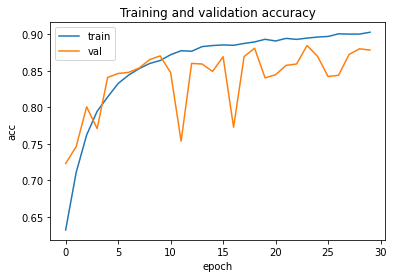

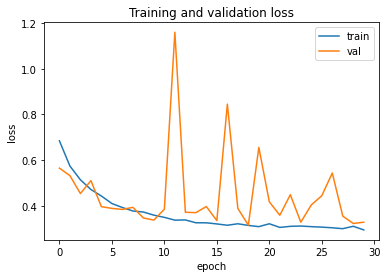

In [176]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.legend(['train','val'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')

plt.figure()
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.legend(['train','val'])
plt.title('Training and validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# Test

In [94]:
from tensorflow.keras.preprocessing import image

In [128]:
img_name = '938.jpg'
path = 'datasets/dogs_vs_cats/test/'
img = image.load_img(path+img_name, target_size=(150, 150))

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = model.predict(images, batch_size=10)
print(classes[0])
if classes[0] > 0.5:
    print("it's a dog!")
else:
    print("it's a cat!")

[1.]
it's a dog!
